In [9]:
%matplotlib inline

> Quantitative analysis, as we define it, is the application of mathematical and/or statistical methods to market data.
>
> — John Forman
>
> * 
> * 

# Implied Volatilities #
* Come back to this section :
    * after finishing part II of the book
    * Go through these 2 courses:
        * [The options guide](http://www.theoptionsguide.com/default.aspx)
        * [Eurex introduction to futures and options](http://www.eurexwbt.de/index.php/en)
    * before starting part III of the book
    
# Monte Carlo Simulation #
* See [Implied Volatilities] section above

# Technical Analysis #

* _In finance, technical analysis is a security analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume._ - [Wikipedia](https://en.wikipedia.org/wiki/Technical_analysis)
* Here, we will focus on the study of past market data for backtesting purposes. Our object of study is the benchmark index Standard & Poor’s 500 (S&P 500), which is generally considered to be a good proxy for the whole stock market in the United States. This is due to the high number of names included in the index and the total market capitalization represented by it. It also has highly liquid futures and options markets.

In [1]:
import numpy

In [3]:
import pandas

In [4]:
from pandas_datareader import DataReader

In [27]:
from matplotlib import pyplot

In [5]:
sp500 = DataReader('^GSPC', data_source='yahoo', start='2000-01-01', end='2014-04-14')

In [6]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
Open         3592 non-null float64
High         3592 non-null float64
Low          3592 non-null float64
Close        3592 non-null float64
Adj Close    3592 non-null float64
Volume       3592 non-null int64
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


In [7]:
sp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

                Volume  
Date                    
2000-01-03   931800000  
2000-01-04  1009000000  
2000-01-05  1085500000  
2000-01-06  1092300000  
2000-01-07  1225200000

In [8]:
sp500.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-04-08  1845.479980  1854.949951  1837.489990  1851.959961  1851.959961   
2014-04-09  1852.640015  1872.430054  1852.380005  1872.180054  1872.180054   
2014-04-10  1872.280029  1872.530029  1830.869995  1833.079956  1833.079956   
2014-04-11  1830.650024  1835.069946  1814.359985  1815.689941  1815.689941   
2014-04-14  1818.180054  1834.189941  1815.800049  1830.609985  1830.609985   

                Volume  
Date                    
2014-04-08  3721450000  
2014-04-09  3308650000  
2014-04-10  3758780000  
2014-04-11  3743460000  
2014-04-14  3111540000

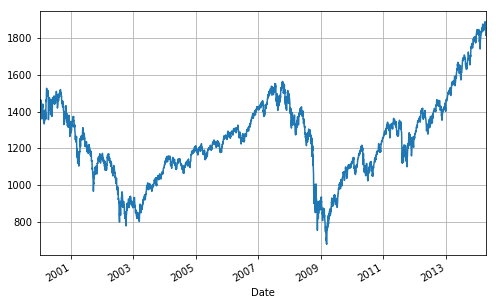

In [10]:
sp500['Close'].plot(grid=True, figsize=(8,5))

* **The trend strategy** we want to implement is based on both a two-month (i.e., 42 trading days) and a one-year (i.e., 252 trading days) trend (i.e., the moving average of the index level for the respective period). 

In [12]:
sp500['42d'] = numpy.round(sp500['Close'].rolling(window=42, center=False).mean(), 2)

In [13]:
sp500['252d'] = numpy.round(sp500['Close'].rolling(window=252, center=False).mean(), 2)

* These two new columns have fewer entries due to the very nature of the data we have generated for these columns—i.e., they start only at those dates when 42 and 252 observation points, respectively, are available for the first time to calculate the desired statistics

In [14]:
sp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

                Volume  42d  252d  
Date                               
2000-01-03   931800000  NaN   NaN  
2000-01-04  1009000000  NaN   NaN  
2000-01-05  1085500000  NaN   NaN  
2000-01-06  1092300000  NaN   NaN  
2000-01-07  1225200000  NaN   NaN

In [15]:
sp500.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-04-08  1845.479980  1854.949951  1837.489990  1851.959961  1851.959961   
2014-04-09  1852.640015  1872.430054  1852.380005  1872.180054  1872.180054   
2014-04-10  1872.280029  1872.530029  1830.869995  1833.079956  1833.079956   
2014-04-11  1830.650024  1835.069946  1814.359985  1815.689941  1815.689941   
2014-04-14  1818.180054  1834.189941  1815.800049  1830.609985  1830.609985   

                Volume      42d     252d  
Date                                      
2014-04-08  3721450000  1853.88  1728.66  
2014-04-09  3308650000  1855.67  1729.79  
2014-04-10  3758780000  1856.46  1730.74  
2014-04-11  3743460000  1856.36  1731.64  
2014-04-14  3111540000  1856.63  1732.74

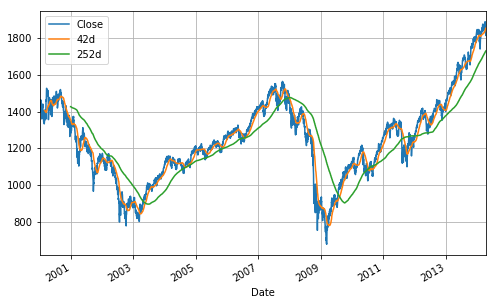

In [17]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8,5))

* Our rule to generate trading signals says the following:
    * **_Buy signal (go long)_**
        * the 42d trend is for the first time SD points above the 252d trend.
    * **_Wait (park in cash)_**
        * the 42d trend is within a range of +/– SD points around the 252d trend.
    * **_Sell signal (go short)_**
        * the 42d trend is for the first time SD points below the 252d trend.

In [18]:
# numerical operations with pandas can in general be implemented in a vectorized fashion, 
# in that one can take the difference between two whole columns
sp500['42d-252d'] = sp500['42d'] - sp500['252d']
sp500['42d-252d'].head()


Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42d-252d, dtype: float64

In [19]:
sp500['42d-252d'].tail()

Date
2014-04-08    125.22
2014-04-09    125.88
2014-04-10    125.72
2014-04-11    124.72
2014-04-14    123.89
Name: 42d-252d, dtype: float64

In [21]:
# signal threshold
SD = 50

In [22]:
# regime - a system or planned way of doing things, here the trend strategy or regime
sp500['regime'] = numpy.where(sp500['42d-252d']>SD, 1, 0)

In [23]:
sp500['regime'] = numpy.where(sp500['42d-252d']<-SD, -1, sp500['regime'])

In [36]:
sp500['regime'].head()

Date
2000-01-03    0
2000-01-04    0
2000-01-05    0
2000-01-06    0
2000-01-07    0
Name: regime, dtype: int32

In [37]:
sp500['regime'].tail()

Date
2014-04-08    1
2014-04-09    1
2014-04-10    1
2014-04-11    1
2014-04-14    1
Name: regime, dtype: int32

In [24]:
sp500['regime'].value_counts()

 1    1489
 0    1232
-1     871
Name: regime, dtype: int64

* **_If the short-term trend crosses the line of the long-term trend it tends to rest there for a (longer) while. This is what we call regime._**

(-1.1, 1.1)

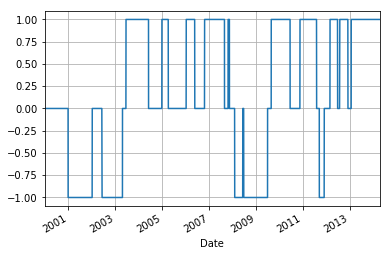

In [33]:
sp500['regime'].plot(grid=True,lw=1.5) # lw = line width

pyplot.ylim([-1.1,1.1]) # get or set the y-limits of the current axes.

* We assume for simplicity that an investor can directly invest in the index or can directly short the index, which in the real world must be accomplished by using index funds, exchange-traded funds, or futures on the index, for example. Such trades inevitably lead to transaction costs, which we neglect here. This seems justifiable since we do not plan to trade “too often.”
* Based on the respective regime, the investor either is long or short in the market (index) or parks his wealth in cash, which does not bear any interest. This simplified strategy allows us to work with market returns only. The investor makes the market return when he is long (1), makes the negative market returns when he is short (–1), and makes no returns (0) when he parks his wealth in cash.

In [34]:
# Market returns
sp500['Market'] = numpy.log(sp500['Close'] / sp500['Close'].shift(1))

In [35]:
sp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

                Volume  42d  252d  42d-252d  regime    Market  
Date                                                           
2000-01-03   931800000  NaN   NaN       NaN       0       NaN  
2000-01-04  1009000000  NaN   NaN       NaN       0 -0.039099  
2000-01-05  1085500000  NaN   NaN       NaN       0  0.001920  
2000-01-06  1092300000  NaN   NaN       NaN       0  0.000955  
2000-01-07  1225200000  NaN   NaN       NaN       0  0.026730